# Udacity Machine Learning Nanodegree

# Capstone Project

Hello there!

This is my capstone project on building a model to make better prosthetics. 

This project is for an open source prosthetic control system which would enable prosthetic devices to have multiple degrees of freedom. https://github.com/cyber-punk-me
The system is built of several components. It connects a muscle activity (EMG, Electromyography) sensor to a user Android/Android Things App. The app collects data, then a server builds a model specifically for this user. After that the model can be downloaded and executed on the device to control motors or other appendages.
This dataset can be used to map user residual muscle gestures to certain actions of a prosthetic such as open/close hand or rotate wrist.

This document is divided into 4 parts:
- Data Exploration
- Data Preprocessing
- Evaluating & Comparing Models
- Model Tuning

## 1. Data Exploration


In this section, we will look at the type of the data we are dealing with, and some visualizations that shall help ius better understand the data we are working with.

In addition, we shall load the data and process it into a matter suitable for performing the above operations.

### 1.1 Loading the data

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix

Our data is present in 4 separate files, one for each class. 

First, we shall load them all into dataframes and take a peek into each of the datasets.

In [3]:
# read dataframes - header=None is given as we do not have the headers in the .csv files
data0 = pd.read_csv("0.csv", header=None)
data1 = pd.read_csv("1.csv", header=None)
data2 = pd.read_csv("2.csv", header=None)
data3 = pd.read_csv("3.csv", header=None)

# Display the first record
display(data0.head(n=1))
display(data1.head(n=1))
display(data2.head(n=1))
display(data3.head(n=1))

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-7.0,-1.0,-1.0,0.0,-10.0,-10.0,-1.0,1.0,-5.0,-5.0,...,6.0,-4.0,-3.0,-5.0,-3.0,15.0,11.0,-4.0,-5.0,1


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,4.0,19.0,-9.0,-7.0,-3.0,-36.0,-6.0,-23.0,3.0,-21.0,...,9.0,-14.0,-2.0,-3.0,-4.0,-21.0,7.0,-8.0,-12.0,2


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-22.0,-9.0,-6.0,-1.0,21.0,26.0,-2.0,5.0,5.0,0.0,...,-10.0,-15.0,-6.0,-3.0,3.0,20.0,25.0,1.0,1.0,3


As we can see above, the last column contains the category we are attempting to clasify i.e the target variable.

Now, we need to combine these 4 Dataframes that we have into 1 big Dataframe so we can visualize different features and work further with the data.
The below code does that, and also shows us the shape of the resulting dataframe.

In [4]:
# append the dataframes into one unified dataset
data = [data0, data1, data2, data3]
data = pd.concat(data, sort=False)
data.shape

(11678, 65)

Now, we take a small peek into the resulting dataset.

In [5]:
data.head(n=1)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0


Finally, since we concatenated the separate datsets earlier into out current dataset, this means that the data is arranged by the output variable in the order of concatenation.

We need to shuffle the data so that our algorithms do not get too biased in any one way or the other. If we do not do this, in case we are using algorithms like K-fold validation to help our classifiers better model the data, the models will wind up not learning from the data properly as the uneven spread will be problematic.

In [6]:
# Shuffle the dataframe to randomize
data = data.sample(frac=1)
data.shape

(11678, 65)

## 1.2 Data Visualization

Now, we shall visualize the data to get a better understanding of how it is distributed.

Before that, we split the data into independant variables X (or features) and the dependant variable y (target variable).

In [7]:
X = data.drop([64],axis=1)
y = data[[64]]

Below, we plot histograms for each of the 64 features we have in out dataset. This will help us get a better understanding of how the data is distributed.

In [1]:
%matplotlib inline
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X.hist(ax = ax)
plt.show()

NameError: name 'plt' is not defined

Now, we will plot a heatmap of the features in our dataset. From here, we can intuitively tell if correlations exist between the different features. 

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5, 58.5, 60.5, 62.5]),
 <a list of 32 Text yticklabel objects>)

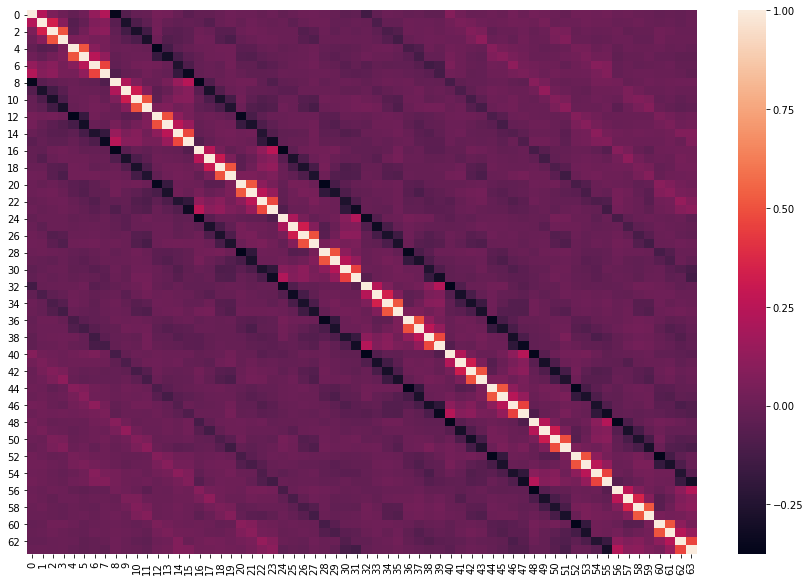

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr())
plt.xticks(rotation=90)
plt.yticks(rotation=0)

From the above, we can see that there is not much correlation between the different features in the datasets. 

This can indicate that doing PCA might not be of much help here, as there is not much correlation to draw off to make the eigenvectors that would be representative of the variance in the data.

## 1.3 Training and Testing Sets

Below, We shall spilt the data into train and test sets.

In [10]:
# Train test split to get train and test sets
from sklearn.model_selection import train_test_split

# Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 1.4 Benchmark Model

In [13]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
clf = tree.DecisionTreeClassifier()
clf.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
y_pred = clf.predict(X_test)
print("Accuracy \n")
print(accuracy_score(y_pred, y_test))
print("\nF1 Score \n")
print(f1_score(y_pred, y_test, average = 'micro'))

Accuracy 

0.791095890410959

F1 Score 

0.791095890410959


# 2. Data Preprocessing

Here, we shall perform 2 major tasks:

- Feature Scaling : In case the As the data is sensor data, and is numerical data reported from different sensors. This means that some features could be disproportionately larger than the others. This would cause issues with the algorithm we’ll be using to model this problem.


- Principal Component Analysis: As the data is collected for a whole hand, there are chances that some of the different features might be correlated to one another. This could also mean that the model would be affected. For PCA, we shall test and see how well the correlations come out to be, and if they are useful at all by testing the efficacy of an algorithm pre and post PCA.

## 2.0 Cleaning The Data

Here, we shall check to see if there are any empty or null values in our dataset. In case there are, we can replace these by a representative statistic of our choice. (ex: mean, median etc.)

In [10]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

As we can see above, we do not have any null values in our dataset. This means that we can go ahead and use it straight away.

## 2.1 Feature Scaling

We shall now perform feature scaling on our data.
We shall also see a visualization similar to earlier.

In [11]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.drop([64],axis=1)
rescaled_X = scaler.fit_transform(X)

In [12]:
rescaled_X = pd.DataFrame(rescaled_X)

In [13]:
rescaled_X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.537445,0.551546,0.522388,0.592308,0.727700,0.614458,0.525490,0.539370,0.468354,0.529915,...,0.494118,0.438017,0.576132,0.566524,0.653333,0.616,0.502347,0.650980,0.549020,0.545817
1,0.466960,0.520619,0.432836,0.569231,0.619718,0.526104,0.482353,0.492126,0.421941,0.538462,...,0.509804,0.541322,0.469136,0.532189,0.586667,0.560,0.488263,0.462745,0.486275,0.501992
2,0.484581,0.530928,0.507463,0.600000,0.610329,0.514056,0.498039,0.488189,0.426160,0.542735,...,0.533333,0.549587,0.465021,0.540773,0.600000,0.576,0.516432,0.435294,0.466667,0.474104
3,0.599119,0.680412,0.656716,0.600000,0.568075,0.558233,0.525490,0.547244,0.464135,0.487179,...,0.486275,0.553719,0.563786,0.618026,0.613333,0.592,0.497653,0.631373,0.517647,0.509960
4,0.422907,0.520619,0.477612,0.546154,0.511737,0.281124,0.505882,0.503937,0.447257,0.542735,...,0.513725,0.595041,0.444444,0.549356,0.640000,0.600,0.483568,0.466667,0.494118,0.454183


In [14]:
X = rescaled_X

In [15]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


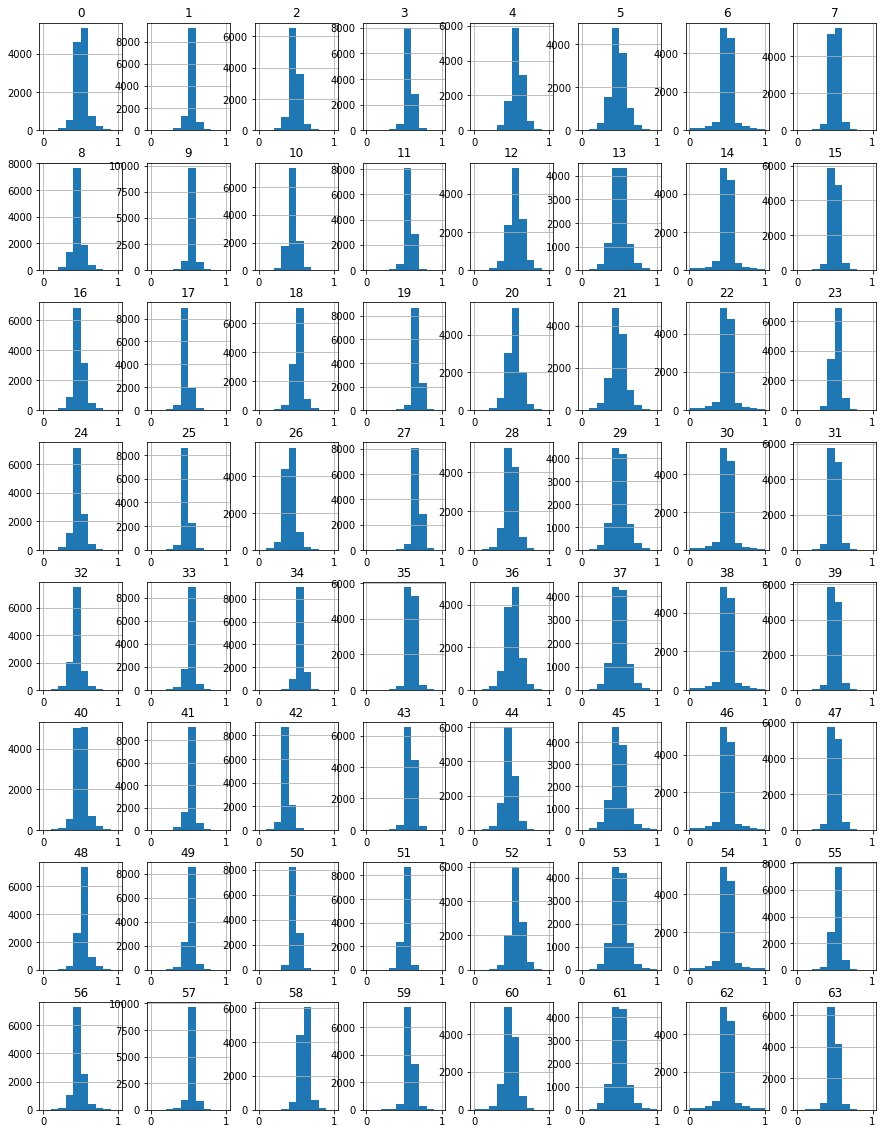

In [16]:
%matplotlib inline
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X.hist(ax = ax)
plt.show()

Now, we have scaled all of our features. 
The graphs above show that they are within the range of [0,1].

## 2.2 Testing with a model before PCA

Based on the data visualization seen above, we can see that the data is now in the range [0,1]. 

As we are unsure based on the heatmap we plotted earlier as to how well PCA will work, we will check how well the same classifier models the data before and after doing PCA.

We shall now train a Random Forest Classifier on the this data. 

In [17]:
# Train test split to get train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
clf = RandomForestClassifier(random_state=100, max_depth=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy \n")
print(accuracy_score(y_pred, y_test))
print("\nF1 Score \n")
print(f1_score(y_pred, y_test, average = 'micro'))

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy 

0.8202054794520548

F1 Score 

0.8202054794520548


So, as we can see above, we get an accuracy of 82% and a F1-score of about 82%.

Let us continue by checking how this model performs on out testing set.

## 2.3 PCA

Here, we shall be applying PCA onto the data, and checking how well PCA captures the variance of the data.

In [19]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.06355192 0.06068093 0.05232303 0.04682559 0.0444351  0.04126497
 0.03950002 0.03874431 0.03412771 0.02693582 0.02604259 0.0253622
 0.024697   0.0241161  0.02279142 0.02208147 0.02161344 0.02055763
 0.01881507 0.01807716 0.01709244 0.01645739 0.01576337 0.01516021
 0.01362832 0.01282726 0.01255563 0.01174782 0.011478   0.01116256
 0.01077317 0.01029567]
0.8314853121498679


The feature with the highest variance in the data captures ~6% of the variance in the data, which is not a great result. 

This corroborates what we saw in the heatmap earlier - there is not much correlation between the features in this dataset.

In [21]:
x = X
nx = pca.transform(X)
X=pd.DataFrame(nx)
y = data[[64]]

## 2.4 Testing with a model after PCA

So, as we can see above, the features obtained as a result of PCA do not seem to help in reducing the dimensionality of the data, nor do they seem to adequately capture the variance in our dataset.

Let us continue by checking how the same Random Forest performs on the features obtained through PCA.

In [22]:
# Train test split to get train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
clf = RandomForestClassifier(random_state=42, max_depth=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy \n")
print(accuracy_score(y_pred, y_test))
print("\nF1 Score \n")
print(f1_score(y_pred, y_test, average = 'micro'))

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy 

0.5659246575342466

F1 Score 

0.5659246575342466


So, it looks like PCA did not help much after all in our case. In fact, it has reduced the accuracy of our classifier.

In this scenario, it would be better to leave the cleaned data as it is and not perform PCA.

In [24]:
X = rescaled_X
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.537445,0.551546,0.522388,0.592308,0.727700,0.614458,0.525490,0.539370,0.468354,0.529915,...,0.494118,0.438017,0.576132,0.566524,0.653333,0.616,0.502347,0.650980,0.549020,0.545817
1,0.466960,0.520619,0.432836,0.569231,0.619718,0.526104,0.482353,0.492126,0.421941,0.538462,...,0.509804,0.541322,0.469136,0.532189,0.586667,0.560,0.488263,0.462745,0.486275,0.501992
2,0.484581,0.530928,0.507463,0.600000,0.610329,0.514056,0.498039,0.488189,0.426160,0.542735,...,0.533333,0.549587,0.465021,0.540773,0.600000,0.576,0.516432,0.435294,0.466667,0.474104
3,0.599119,0.680412,0.656716,0.600000,0.568075,0.558233,0.525490,0.547244,0.464135,0.487179,...,0.486275,0.553719,0.563786,0.618026,0.613333,0.592,0.497653,0.631373,0.517647,0.509960
4,0.422907,0.520619,0.477612,0.546154,0.511737,0.281124,0.505882,0.503937,0.447257,0.542735,...,0.513725,0.595041,0.444444,0.549356,0.640000,0.600,0.483568,0.466667,0.494118,0.454183


We shall save the cleaned data here as we may be requiring it later.

In [25]:
# Train test split to get train and test sets
from sklearn.model_selection import train_test_split

# First time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
SaveX_train = X_train
SaveX_test = X_test
Savey_train = y_train
Savey_test = y_test

# 3. Evaluating and Comparing Models

Now, we shall proceed to take several different classifiers, and use these to model the data. Then we shall compare how well they perform on the data. 

We shall be checking with the following models:
- Logistic Regression
- Decision Trees
- Random Forests
- AdaBoost

For the above models, we can use K-fold cross validation to make sure we do not waste any of the training set on cross-validation, which will help our models learn better as they wil have a larger training set available to them.

We shall also experiment with a Deep Learning Multi Layer Perceptron(MLP) and see how well this performs. 

To compare the models, we shall use 2 metrics:
- Accuracy
- F1 Score

## 3.1 Model Comparison

We are not sure which models will perform well. So, we shall try and compare a number of models to see which one performs the best.

In [26]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [27]:
scoring = ['accuracy', 'f1_macro']
models = []
models.append(('1. Logistic Regression', LogisticRegression()))
models.append(('2. Decision Tree', DecisionTreeClassifier()))
models.append(('3. Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('4. AdaBoost', AdaBoostClassifier(RandomForestClassifier(n_estimators=100))))

op = ""
for name, model in models:
    kfold = model_selection.KFold(n_splits = 4, random_state = 47, shuffle=True)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv = kfold, scoring=scoring, return_train_score=True )
    print(name+"\nThe accuracy and F1 score are:\n")
    op+=name+"\nThe accuracy and F1 score are:\n"
    for met in scoring:
        key = 'test_'+met
        print(np.mean(cv_results[key]))
        op=op+str(np.mean(cv_results[key]))+"\n"

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\athithya\anac

1. Logistic Regression
The accuracy and F1 score are:

0.3395396237276701
0.33945200953222576
2. Decision Tree
The accuracy and F1 score are:

0.7688922204540788
0.7696804477111725


c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_va

3. Random Forest
The accuracy and F1 score are:

0.9146866108357044
0.9144864141906249


c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

4. AdaBoost
The accuracy and F1 score are:

0.9156494291015225
0.9154543043569198


In [28]:
print(op)

1. Logistic Regression
The accuracy and F1 score are:
0.3395396237276701
0.33945200953222576
2. Decision Tree
The accuracy and F1 score are:
0.7688922204540788
0.7696804477111725
3. Random Forest
The accuracy and F1 score are:
0.9146866108357044
0.9144864141906249
4. AdaBoost
The accuracy and F1 score are:
0.9156494291015225
0.9154543043569198



## 3.2 MLP Classifier

Below, we shall create a Multi Layer Perceptron (MLP) with 3 hidden layers that make use of the ReLu activation function, and with multiple dropout layers.

We will one-hot encode the target variable so we can create an output layer for the MLP with 4 nodes that use the softmax activation function.

In addition, we shall be splitting the data twice, to get the training, cross-validation and testing sets.

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


In [30]:
X = data.drop([64],axis=1)
y = data[[64]]

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y)
enc.categories_

[array([0, 1, 2, 3], dtype=int64)]

In [32]:
y2=enc.transform(y)
y2 = pd.DataFrame(y2.todense())
y2.head()

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


In [33]:
# Train test split twice to get train, cross validation and test sets
from sklearn.model_selection import train_test_split

# First time
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=0)

# Second time
X_train, X_crossval, y_train, y_crossval = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [34]:
# Build the model architecture
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(64,)))
model.add(Dropout(0.25))
model.add(Dense(16, activation="relu"))
model.add(Dropout(.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(.1))
model.add(Dense(4, activation="softmax"))

# Compile the model using a loss function and an optimizer.
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
Total para

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
from keras.callbacks import ModelCheckpoint  
epochs = 50
checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, 
          validation_data=(X_crossval, y_crossval),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 7006 samples, validate on 2336 samples
Epoch 1/50
7006/7006 [==============================] - 1s 134us/step - loss: 3.8467 - acc: 0.2726 - val_loss: 1.3949 - val_acc: 0.2676

Epoch 00001: val_loss improved from inf to 1.39492, saving model to weights.best.from_scratch.hdf5
Epoch 2/50
7006/7006 [==============================] - 1s 80us/step - loss: 1.4596 - acc: 0.2900 - val_loss: 1.3650 - val_acc: 0.2740

Epoch 00002: val_loss improved from 1.39492 to 1.36498, saving model to weights.best.from_scratch.hdf5
Epoch 3/50
7006/7006 [==============================] - 1s 192us/step - loss: 1.3600 - acc: 0.3080 - val_loss: 1.3091 - val_acc: 0.3211

Epoch 00003: val_loss improved from 1.36498 to 1.30906, saving model to weights.best.from_scratch.hdf5
Epoch 4/50
7006/7006 [==============================] - 1s 107us/step - loss: 1.3064 - acc: 0.3354 - val_loss: 1.2534 - val_acc: 0.3639

Epoch 00004: val_loss improved from 1.30906 to 1.25337, saving model to weights.best.from_scratch.hd

In [37]:
y_pred = model.predict(X_test)
print(y_pred)

[[1.39096873e-02 1.41312266e-02 9.70822215e-01 1.13685464e-03]
 [9.81455028e-01 1.54220425e-36 1.25313923e-03 1.72918122e-02]
 [1.16514997e-03 8.59623194e-01 2.82899886e-02 1.10921666e-01]
 ...
 [1.67226177e-02 2.80818553e-04 9.82389331e-01 6.07225869e-04]
 [9.99975204e-01 0.00000000e+00 2.76340604e-08 2.47724656e-05]
 [1.15588156e-03 9.29592669e-01 3.73310186e-02 3.19203548e-02]]


In [38]:
print("Accuracy \n")
print(accuracy_score(y_pred.round(), y_test))
print("\nF1 Score \n")
print(f1_score(y_pred.round(), y_test, average = 'micro'))

Accuracy 

0.8831335616438356

F1 Score 

0.8932669408962979


So, now we have trained several models. Taking into account that the neural networks take much longer to train and model the data, and that the metrics in the case of the AdaBoost are higher, we shall be picking AdaBoost as our classifier to model this problem.

## 4. Model Tuning

So, we have decided on using Adaboost to model our problem. We shall proceed and optimize it further so we can improve its metrics of prediction. 

## 4.1 Pre-tuning metrics

We take our cleaned data that we used earlier when we were comparing Models.

In [39]:
X_train = SaveX_train
X_test = SaveX_test
y_train = Savey_train
y_test = Savey_test

In [41]:
clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy \n")
print(accuracy_score(y_pred.round(), y_test))
print("\nF1 Score \n")
print(f1_score(y_pred, y_test, average = 'micro'))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 

0.9216609589041096

F1 Score 

0.9216609589041096
Confusion Matrix: 
 [[568   0   6  10]
 [  2 527  19  38]
 [  8   7 577  16]
 [ 29  16  32 481]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       584
           1       0.96      0.90      0.93       586
           2       0.91      0.95      0.93       608
           3       0.88      0.86      0.87       558

   micro avg       0.92      0.92      0.92      2336
   macro avg       0.92      0.92      0.92      2336
weighted avg       0.92      0.92      0.92      2336



## 4.2 Tuning

Now, we shall proceed to use Grid Search to optimize our Adaboost classifier with different hyperparameters.

In [42]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


In [43]:
clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100))
clf.fit(X_train, y_train)

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [44]:
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1, 3, 5, 10]
 }
scorer = make_scorer(accuracy_score)
gridsearch = GridSearchCV(clf, param_dist, scoring=scorer)
gridsearch.fit(X_train, y_train)

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when 

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min...e=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [45]:
print(gridsearch.best_params_)
print("===========================================================================================")
print(gridsearch.best_score_)

{'learning_rate': 1, 'n_estimators': 100}
0.9154356668807536


Finally, we shall check the final scores achieved by our optimized model.

In [46]:
tuned_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), learning_rate=0.1)
tuned_clf.fit(X_train, y_train)
y_pred = tuned_clf.predict(X_test)
print("Accuracy \n")
print(accuracy_score(y_pred.round(), y_test))
print("\nF1 Score \n")
print(f1_score(y_pred, y_test, average = 'micro'))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 

0.9225171232876712

F1 Score 

0.9225171232876712
Confusion Matrix: 
 [[570   0   7   7]
 [  2 525  25  34]
 [  9   7 573  19]
 [ 31  15  25 487]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       584
           1       0.96      0.90      0.93       586
           2       0.91      0.94      0.93       608
           3       0.89      0.87      0.88       558

   micro avg       0.92      0.92      0.92      2336
   macro avg       0.92      0.92      0.92      2336
weighted avg       0.92      0.92      0.92      2336



In [ ]:
#plot graph of feature importances 
fig = plt.figure(figsize = (15,20))
feat_importances = pd.Series(tuned_clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()